<a href="https://colab.research.google.com/github/zonezero2604/Project_HKII_3/blob/master/Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ban đầu mình import các thư viện vào chương trình

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random


print(tf.__version__)

2.5.0


Chuẩn bị data  gồm tập dùng để train và test. Dữ liệu về quần áo và giày dép từ Fashion MNIST, chứa khoảng 70,000 ảnh đen trắng phân thành 10 loại. Mỗi một ảnh là một loại quần áo hoặc giày dép với độ phân giải thấp (28 by 28 pixel) với mỗi pixel có giá trị từ 0 đến 255. Với tập dữ liệu này, 60.000 ảnh sẽ được dùng để huấn luyện và 10.000 ảnh sẽ đường dùng để đánh giá khả năng phân loại nhận diện ảnh của mạng neuron. 

In [ ]:
fashion_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Mỗi ảnh sẽ được gán với một nhãn duy nhất. 

In [ ]:
class_names = ['Số 0', 'Số 1', 'Số 2', 'Số 3', 'Số 4',
               'Số 5', 'Số 6', 'Số 7', 'Số 8', 'Số 9']

## Mô tả dữ liệu chúng ta sử dụng cho model



In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

## Tiền xử lý dữ liệu

Ban đầu em in thử 1 tấm ảnh ra xem trước

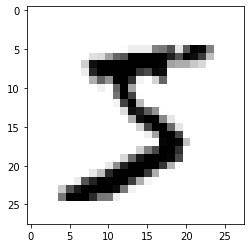

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()
# isns.imgplot(train_images[0])

In [ ]:
train_images = train_images.reshape(60000, 28, 28,1)
test_images = test_images.reshape(10000, 28, 28,1)

In [ ]:

# One hot encoding label (Y)
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

In [ ]:
# normalization =>  0-1
train_images = train_images / 255.0

test_images = test_images / 255.0

## Xây dựng mô hình

Để xây dựng mạng neuron, chúng tay cần cấu hình các layer của mô hình, và sau đó biên dịch mô hình.


In [ ]:
# Định nghĩa model
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1), padding='same'))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid', padding='same'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 813,802
Trainable params: 813,802
Non-trainable params: 0
__________________________________________________

In [ ]:
# Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='CategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 48s 3ms/step - loss: 1.4004 - accuracy: 0.4978
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1466 - accuracy: 0.9568
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0391 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0176 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0135 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

Đánh giá mô hình thông qua tập test

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.0521 - accuracy: 0.9846

Test accuracy: 0.9846000075340271


Dự đoán dữ liệu

In [ ]:
predictions = model.predict(test_images)
print(len(predictions))
print(predictions[0])
test_labels[0]

10000
[2.4625896e-08 2.0324485e-07 1.3039995e-06 6.5441432e-06 1.4786301e-08
 1.0056027e-09 8.1636448e-11 9.9997246e-01 4.4819153e-08 1.9427656e-05]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# HÀM VẼ HÌNH
def plot_image(i, predictions_array, true_label, img): # i: lựa chọn ảnh nào, predictions_array(có 10 phần tử): nhãn dự đoán của mẫu thứ i, true_label: nhãn THỰC của mẫu thứ i, img: các pixel 28*28 để vẽ ảnh THỰC thứ i
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# HÀM VẼ BIỂU ĐỒ
def plot_value_array(i, predictions_array, true_label): # i: lựa chọn ảnh nào, predictions_array(có 10 phần tử): nhãn dự đoán của mẫu thứ i, true_label: nhãn THỰC của mẫu thứ i
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") # vẽ biểu đồ với cột là màu xám
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)

  thisplot[predicted_label].set_color('red') # số của nhãn dữ đoán thì màu đỏ
  thisplot[true_label].set_color('blue')     # số của nhãn THỰC thì màu xanh

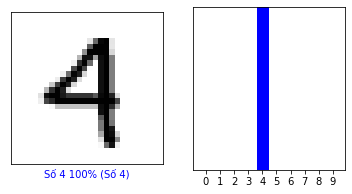

In [ ]:
i = random.randint(0, 999)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

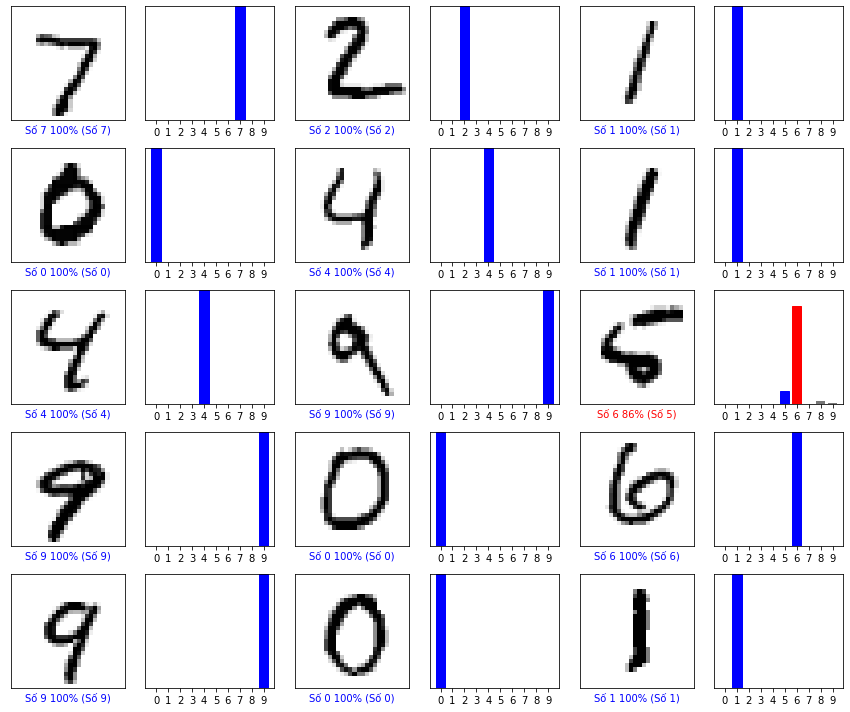

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Giá trị dự đoán:  Số 2


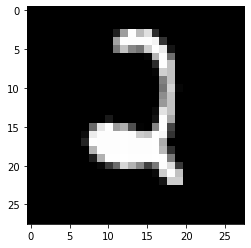

In [ ]:
x=random.randint(0, 9999)
plt.imshow(test_images[x].reshape(28,28), cmap='gray')
predictions = model.predict(test_images[x].reshape(1,28,28,1))
print('Giá trị dự đoán: ', class_names[np.argmax(predictions)])
